<a href="https://colab.research.google.com/github/marceloguerrav/EGADE/blob/main/Proyecto_final_econometria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload Excel files for: AAL, UAL, JBLU, XOM, WMT, AMZN (one per ticker)


Saving AAL.xlsx to AAL (4).xlsx
Saving AMZN.xlsx to AMZN (4).xlsx
Saving JBLU.xlsx to JBLU (4).xlsx
Saving UAL.xlsx to UAL (4).xlsx
Saving WMT.xlsx to WMT (4).xlsx
Saving XOM.xlsx to XOM (4).xlsx
AAL: 780 closing prices
UAL: 520 closing prices
JBLU: 780 closing prices
XOM: 780 closing prices
WMT: 780 closing prices
AMZN: 780 closing prices

==================== AAL ANALYSIS ====================

ADF Test – AAL
ADF: -1.0465  p=0.7359
Non-stationary

Phillips-Perron – AAL
PP: -1.0043  p=0.7517
Non-stationary

Zivot-Andrews – AAL
ZA: -3.9038  p=0.4109  BP=2
No break


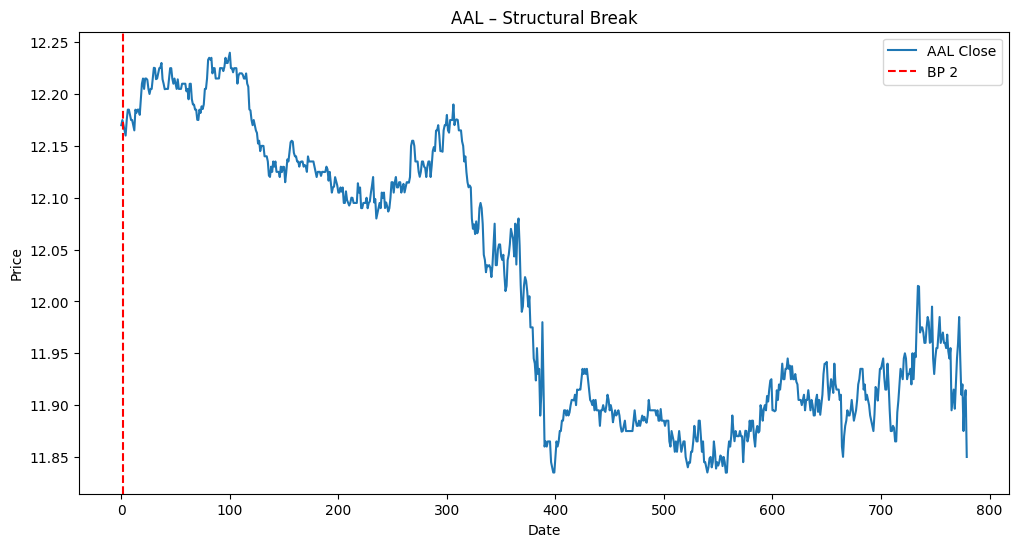

Break date: 2025-10-20 13:57:00

ARMA(2,0) – AAL
ARMA error: 0

ARIMA(1,1,1) – AAL
ARIMA error: 0

Random Walk – AAL
RW error: 0

==================== UAL ANALYSIS ====================

ADF Test – UAL
ADF: -0.3459  p=0.9188
Non-stationary

Phillips-Perron – UAL
PP: -0.4400  p=0.9032
Non-stationary

Zivot-Andrews – UAL
ZA: -6.1694  p=0.0006  BP=17
Break


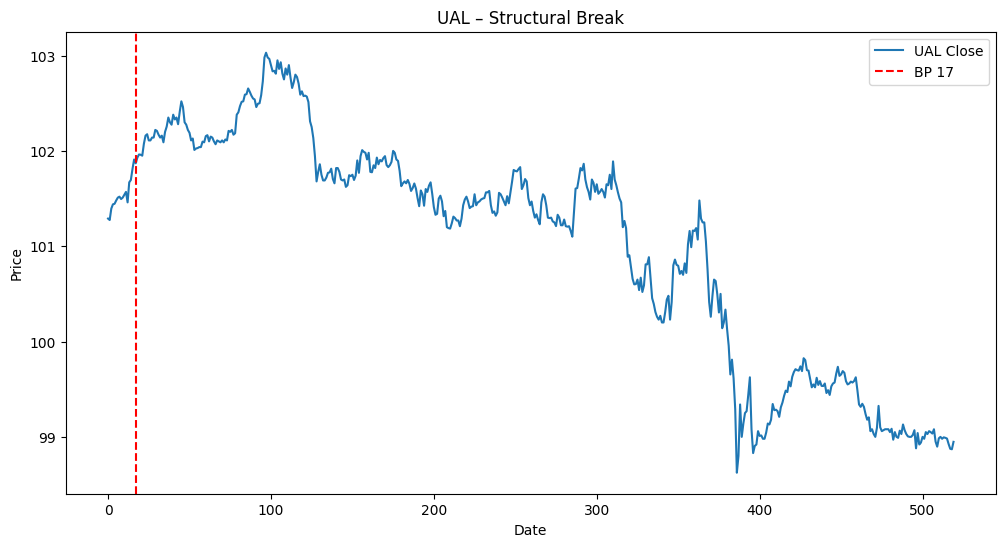

Break date: 2025-10-20 13:42:00

ARMA(2,0) – UAL
ARMA error: 0

ARIMA(1,1,1) – UAL
ARIMA error: 0

Random Walk – UAL
RW error: 0

==================== JBLU ANALYSIS ====================

ADF Test – JBLU
ADF: -2.7680  p=0.0630
Non-stationary

Phillips-Perron – JBLU
PP: -2.9587  p=0.0389
Stationary

Zivot-Andrews – JBLU
ZA: -5.3784  p=0.0065  BP=1
Break


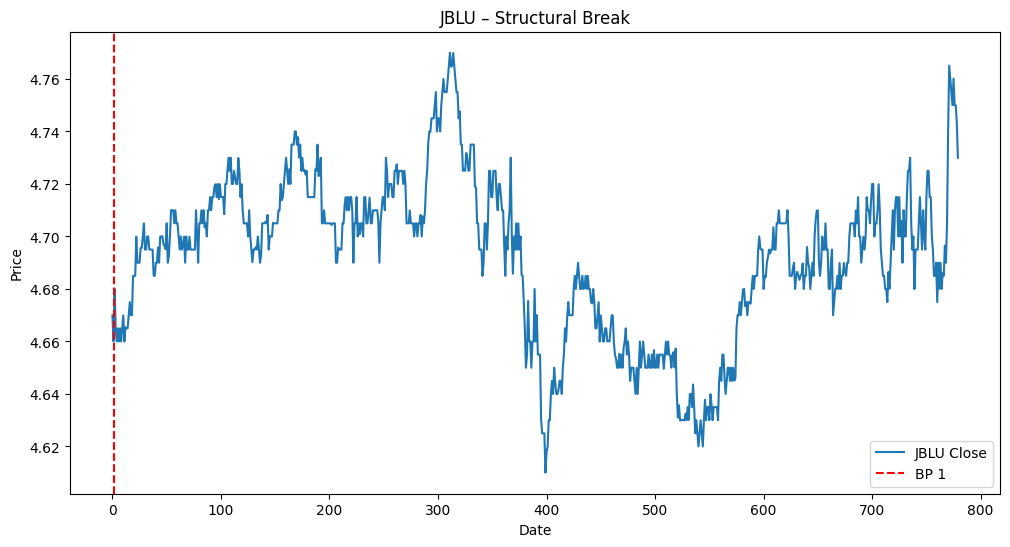

Break date: 2025-10-20 13:58:00

ARMA(2,0) – JBLU
ARMA error: 0

ARIMA(1,1,1) – JBLU
ARIMA error: 0

Random Walk – JBLU
RW error: 0

==================== XOM ANALYSIS ====================

ADF Test – XOM
ADF: -2.2126  p=0.2017
Non-stationary

Phillips-Perron – XOM
PP: -2.4547  p=0.1269
Non-stationary

Zivot-Andrews – XOM
ZA: -4.8768  p=0.0426  BP=17
Break


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


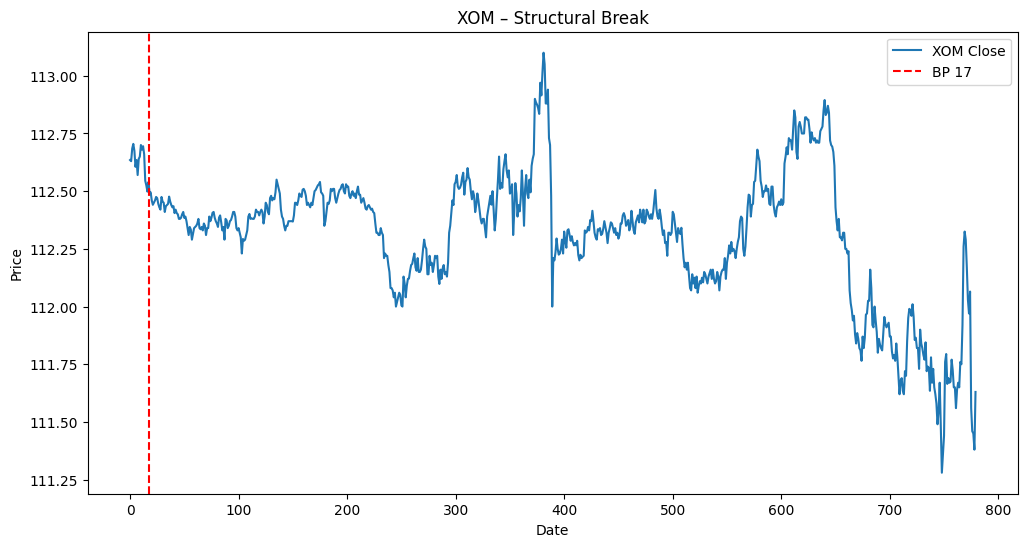

Break date: 2025-10-20 13:42:00

ARMA(2,0) – XOM
ARMA error: 0

ARIMA(1,1,1) – XOM
ARIMA error: 0

Random Walk – XOM
RW error: 0

==================== WMT ANALYSIS ====================

ADF Test – WMT
ADF: -1.1861  p=0.6795
Non-stationary

Phillips-Perron – WMT
PP: -1.4771  p=0.5448
Non-stationary

Zivot-Andrews – WMT
ZA: -2.8517  p=0.9458  BP=8
No break


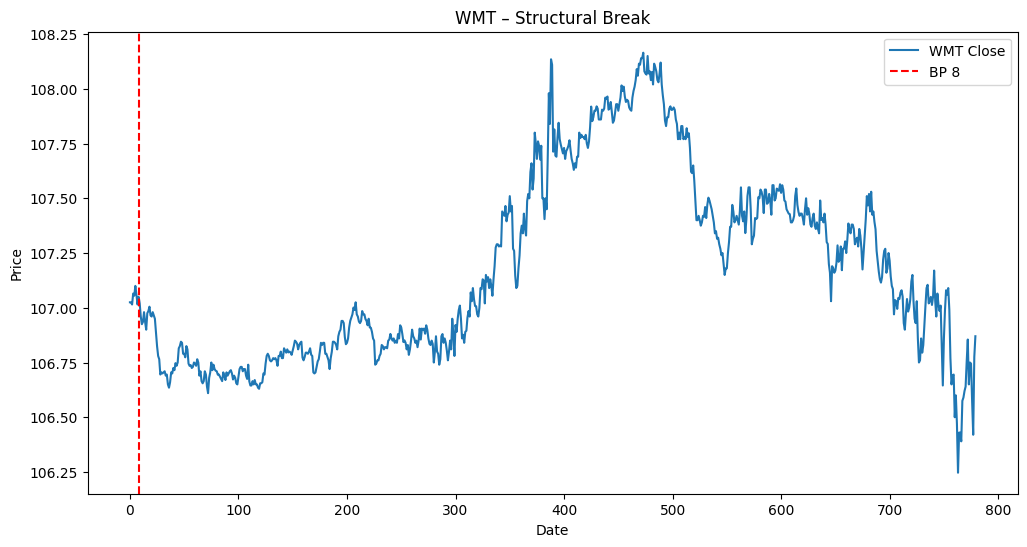

Break date: 2025-10-20 13:51:00

ARMA(2,0) – WMT
ARMA error: 0

ARIMA(1,1,1) – WMT
ARIMA error: 0

Random Walk – WMT
RW error: 0

==================== AMZN ANALYSIS ====================

ADF Test – AMZN
ADF: -1.8202  p=0.3705
Non-stationary

Phillips-Perron – AMZN
PP: -1.7357  p=0.4128
Non-stationary

Zivot-Andrews – AMZN
ZA: -3.8271  p=0.4613  BP=0
No break


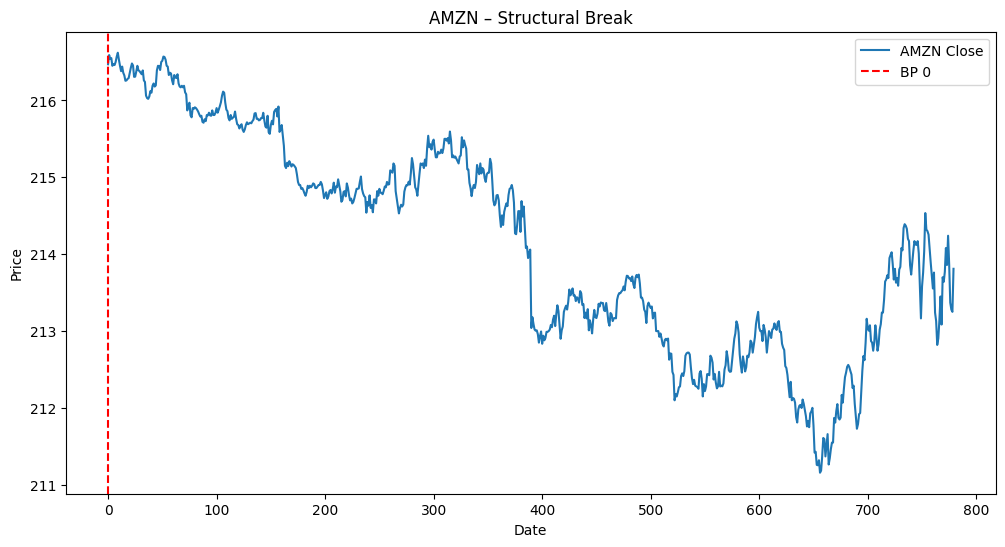

Break date: 2025-10-20 13:59:00

ARMA(2,0) – AMZN
ARMA error: 0

ARIMA(1,1,1) – AMZN
ARIMA error: 0

Random Walk – AMZN
RW error: 0

PAIRWISE COINTEGRATION

AAL vs UAL
Stat: -4.5393  p: 0.0011
Cointegrated

AAL vs JBLU
Stat: -1.3830  p: 0.8033
Not cointegrated

AAL vs XOM
Stat: -1.4389  p: 0.7839
Not cointegrated

AAL vs WMT
Stat: -1.1621  p: 0.8675
Not cointegrated

AAL vs AMZN
Stat: -2.7568  p: 0.1798
Not cointegrated

UAL vs JBLU
Stat: -2.1187  p: 0.4666
Not cointegrated

UAL vs XOM
Stat: -0.3879  p: 0.9714
Not cointegrated

UAL vs WMT
Stat: -3.3844  p: 0.0441
Cointegrated

UAL vs AMZN
Stat: -3.6595  p: 0.0206
Cointegrated

JBLU vs XOM
Stat: -2.7705  p: 0.1753
Not cointegrated

JBLU vs WMT
Stat: -4.5836  p: 0.0009
Cointegrated

JBLU vs AMZN
Stat: -3.3425  p: 0.0491
Cointegrated

XOM vs WMT
Stat: -2.2565  p: 0.3955
Not cointegrated

XOM vs AMZN
Stat: -2.1333  p: 0.4590
Not cointegrated

WMT vs AMZN
Stat: -2.1078  p: 0.4723
Not cointegrated


In [8]:
# ts_analysis.py
# Multi-ticker time-series analysis – ready for HTML report

import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller, zivot_andrews, coint
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from arch.unitroot import PhillipsPerron
from itertools import combinations

# ------------------------------------------------------------------
# 1. Tickers & columns
# ------------------------------------------------------------------
TICKERS   = ["AAL", "UAL", "JBLU", "XOM", "WMT", "AMZN"]
price_col = "Close"
date_col  = "Date"

print(f"Please upload Excel files for: {', '.join(TICKERS)} (one per ticker)")
uploaded = files.upload()

# ------------------------------------------------------------------
# 2. Map uploaded files → tickers
# ------------------------------------------------------------------
ticker_files = {}
for t in TICKERS:
    matches = [f for f in uploaded.keys() if t in f.upper()]
    if matches:
        ticker_files[t] = matches[0]
    else:
        print(f"WARNING: No file for {t}")

# ------------------------------------------------------------------
# 3. Load DataFrames
# ------------------------------------------------------------------
dfs = {}
for t, f in ticker_files.items():
    try:
        dfs[t] = pd.read_excel(f)
    except Exception as e:
        print(f"Error loading {t} ({f}): {e}")

# ------------------------------------------------------------------
# 4. Extract closing prices & optional dates
# ------------------------------------------------------------------
close_series = {}
date_series  = {}
for t, df in dfs.items():
    try:
        close_series[t] = df[price_col].dropna().reset_index(drop=True)
        if date_col in df.columns:
            date_series[t] = df[date_col].reset_index(drop=True)
        else:
            date_series[t] = None
        print(f"{t}: {len(close_series[t])} closing prices")
    except KeyError:
        print(f"Error: '{price_col}' column missing in {t}")

# ------------------------------------------------------------------
# 5. Unit-root tests
# ------------------------------------------------------------------
def adf_test(s, n):
    print(f"\nADF Test – {n}")
    r = adfuller(s, regression='c', autolag='AIC')
    print(f"ADF: {r[0]:.4f}  p={r[1]:.4f}")
    print("Stationary" if r[1] < 0.05 else "Non-stationary")
    return r

def pp_test(s, n):
    print(f"\nPhillips-Perron – {n}")
    r = PhillipsPerron(s, lags=None)
    print(f"PP: {r.stat:.4f}  p={r.pvalue:.4f}")
    print("Stationary" if r.pvalue < 0.05 else "Non-stationary")
    return r

def za_test(s, n):
    print(f"\nZivot-Andrews – {n}")
    r = zivot_andrews(s, regression='c', autolag='AIC')
    print(f"ZA: {r[0]:.4f}  p={r[1]:.4f}  BP={r[3]}")
    print("Break" if r[1] < 0.05 else "No break")
    return r

# ------------------------------------------------------------------
# 6. Models
# ------------------------------------------------------------------
def fit_arima(s, n):
    print(f"\nARIMA(1,1,1) – {n}")
    try:
        m = ARIMA(s, order=(1,1,1)).fit()
        f = m.forecast(1)[0]
        print(m.summary())
        print(f"ARIMA forecast: {f:.4f}")
        return m, f
    except Exception as e:
        print(f"ARIMA error: {e}")
        return None, None

def fit_arma(s, n):
    print(f"\nARMA(2,0) – {n}")
    try:
        m = AutoReg(s, lags=2, old_names=False).fit()
        f = m.forecast(1)[0]
        print(m.summary())
        print(f"ARMA forecast: {f:.4f}")
        return m, f
    except Exception as e:
        print(f"ARMA error: {e}")
        return None, None

def fit_rw(s, n):
    print(f"\nRandom Walk – {n}")
    try:
        m = ARIMA(s, order=(0,1,0)).fit()
        f = m.forecast(1)[0]
        print(m.summary())
        print(f"RW forecast: {f:.4f}")
        return m, f
    except Exception as e:
        print(f"RW error: {e}")
        return None, None

# ------------------------------------------------------------------
# 7. Plot with safe breakpoint date
# ------------------------------------------------------------------
def plot_break(s, n, bp_idx, dates):
    plt.figure(figsize=(12,6))
    plt.plot(s, label=f"{n} Close")
    plt.axvline(bp_idx, color='red', ls='--', label=f"BP {bp_idx}")
    plt.title(f"{n} – Structural Break")
    plt.xlabel('Date' if dates is not None else 'Index')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    # SAFE date lookup
    if dates is not None and len(dates) > 0 and 0 <= bp_idx < len(dates):
        print(f"Break date: {dates.iloc[bp_idx]}")
    else:
        print(f"Break index: {bp_idx}")

# ------------------------------------------------------------------
# 8. Run everything
# ------------------------------------------------------------------
results = {}
for t, ser in close_series.items():
    print(f"\n{'='*20} {t} ANALYSIS {'='*20}")
    adf = adf_test(ser, t)
    pp  = pp_test(ser, t)
    za  = za_test(ser, t)
    plot_break(ser, t, za[3], date_series[t])
    arma_m, arma_f = fit_arma(ser, t)
    arima_m, arima_f = fit_arima(ser, t)
    rw_m, rw_f = fit_rw(ser, t)
    results[t] = {
        "adf": adf, "pp": pp, "za": za,
        "arma": arma_m, "arma_f": arma_f,
        "arima": arima_m, "arima_f": arima_f,
        "rw": rw_m, "rw_f": rw_f
    }

# ------------------------------------------------------------------
# 9. Cointegration
# ------------------------------------------------------------------
print("\nPAIRWISE COINTEGRATION")
for a, b in combinations(close_series.keys(), 2):
    s1, s2 = close_series[a], close_series[b]
    L = min(len(s1), len(s2))
    print(f"\n{a} vs {b}")
    ct, pv, _ = coint(s1[:L], s2[:L])
    print(f"Stat: {ct:.4f}  p: {pv:.4f}")
    print("Cointegrated" if pv < 0.05 else "Not cointegrated")

In [9]:
# --------------------------------------------------------------
# HTML REPORT CELL – paste this in a new cell
# --------------------------------------------------------------
!pip install -q pygments matplotlib arch

import io, base64, sys
from pygments import highlight
from pygments.lexers import PythonLexer
from pygments.formatters import HtmlFormatter
import matplotlib.pyplot as plt
from google.colab import files

print("Upload your clean .py file (e.g., ts_analysis.py)")
uploaded = files.upload()
py_file = list(uploaded.keys())[0]

# Capture stdout + figures
old_stdout = sys.stdout
sys.stdout = mystdout = io.StringIO()
fig_buffer = []

def capture_figures():
    for i in plt.get_fignums():
        fig = plt.figure(i)
        buf = io.BytesIO()
        fig.savefig(buf, format='png', bbox_inches='tight', dpi=150)
        buf.seek(0)
        fig_buffer.append(base64.b64encode(buf.read()).decode())
        plt.close(fig)

_original_show = plt.show
def new_show(*a, **k):
    capture_figures()
    return _original_show(*a, **k)
plt.show = new_show

# Run the uploaded .py
with open(py_file, encoding='utf-8') as f:
    code = f.read()
exec(code)
capture_figures()

stdout_text = mystdout.getvalue()
sys.stdout = old_stdout

# Build HTML
formatter = HtmlFormatter(style='solarized-light', linenos=True)
highlighted = highlight(code, PythonLexer(), formatter)

plot_html = "\n".join(
    f'<div class="plot"><img src="data:image/png;base64,{b64}"></div>'
    for b64 in fig_buffer
)

html_report = f"""
<!DOCTYPE html>
<html><head><meta charset="utf-8">
<title>Time-Series Report</title>
<style>
  body{{font-family:Arial;margin:40px;background:#f9f9f9;}}
  h1{{color:#2c3e50;text-align:center;}}
  h2{{color:#2980b9;border-bottom:1px solid #ddd;padding-bottom:8px;}}
  pre{{background:#f4f4f4;padding:12px;border-radius:5px;overflow-x:auto;}}
  .plot{{text-align:center;margin:30px 0;}}
  .plot img{{max-width:100%;border:1px solid #ddd;border-radius:5px;}}
  .footer{{margin-top:50px;text-align:center;color:#7f8c8d;font-size:0.9em;}}
  {formatter.get_style_defs('.codehilite')}
</style>
</head><body>
<h1>Multi-Ticker Time-Series Report</h1>
<p><strong>Script:</strong> <code>{py_file}</code></p>
<hr>

<h2>Source Code</h2>
{highlighted}

<h2>Console Output</h2>
<pre>{stdout_text}</pre>

<h2>Plots</h2>
{plot_html}

<div class="footer">
Generated on {__import__('datetime').datetime.now().strftime('%Y-%m-%d %H:%M')}
</div>
</body></html>
"""

report_file = py_file.replace('.py', '_report.html')
with open(report_file, 'w', encoding='utf-8') as f:
    f.write(html_report)

print(f"\nReport ready: {report_file}")
files.download(report_file)

Upload your clean .py file (e.g., ts_analysis.py)


Saving proyecto_final_econometria (3).py to proyecto_final_econometria (3).py


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Report ready: proyecto_final_econometria (3)_report.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>